# Univariate Time Series Analysis and Forecasting with Python

###### About Time Series analysis
* Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
* Time series forecasting is the use of a model to predict future values based on previously observed values.

In [1]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## The Data

<p>We are using Superstore sales data that can be downloaded from <a href = 'https://community.tableau.com/docs/DOC-1236'>here</a>.</p>

In [2]:
# read the excel file
Chemical = pd.read_excel("E:\Main\File Uploads\DemandTrain.xls")
Chemical.head()

,date,mean_demand_kiloGallon
0,2014-01-01,10.40
1,2014-01-02,7.03
2,2014-01-03,6.95
3,2014-01-04,9.01
4,2014-01-05,6.12


In [4]:
Chemical.describe()

,mean_demand_kiloGallon
count,1462.000000
mean,25.474610
std,7.390851
min,6.120000
25%,18.757500
50%,27.440000
75%,31.247500
max,39.730000


## Data Preprocessing

In [5]:
# Remove columns which are not required in predictions

##cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
##Chemical.drop(cols, axis = 1, inplace = True)
Chemical.head()

,date,mean_demand_kiloGallon
0,2014-01-01,10.40
1,2014-01-02,7.03
2,2014-01-03,6.95
3,2014-01-04,9.01
4,2014-01-05,6.12


In [6]:
# Sort the date 
Chemical = Chemical.sort_values('date')

#print the sorted values
print(Chemical.head(1))

#check any missing values
Chemical.isnull().sum()

        date  mean_demand_kiloGallon
0 2014-01-01                    10.4


date                      0
mean_demand_kiloGallon    0
dtype: int64

In [7]:
# grouping sales according to date
Chemical.groupby('date')['mean_demand_kiloGallon'].sum().reset_index()

# min and max values of date
print(Chemical['date'].min())
print(Chemical['date'].max())

2014-01-01 00:00:00
2018-01-01 00:00:00


In [8]:
#set 'date' as index
Chemical = Chemical.set_index('date')
Chemical.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
               '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30',
               '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [9]:
# average the daily sales value for each month 
# use start of each month as the timestamp
y = Chemical['mean_demand_kiloGallon'].resample('MS').mean()
y['2017':]

date
2017-01-01    15.205806
2017-02-01    19.078929
2017-03-01    25.522903
2017-04-01    32.703333
2017-05-01    34.793226
2017-06-01    35.224667
2017-07-01    30.690645
2017-08-01    31.348065
2017-09-01    31.440667
2017-10-01    28.964516
2017-11-01    22.926667
2017-12-01    17.668387
2018-01-01    10.500000
Freq: MS, Name: mean_demand_kiloGallon, dtype: float64

## Data Visualization

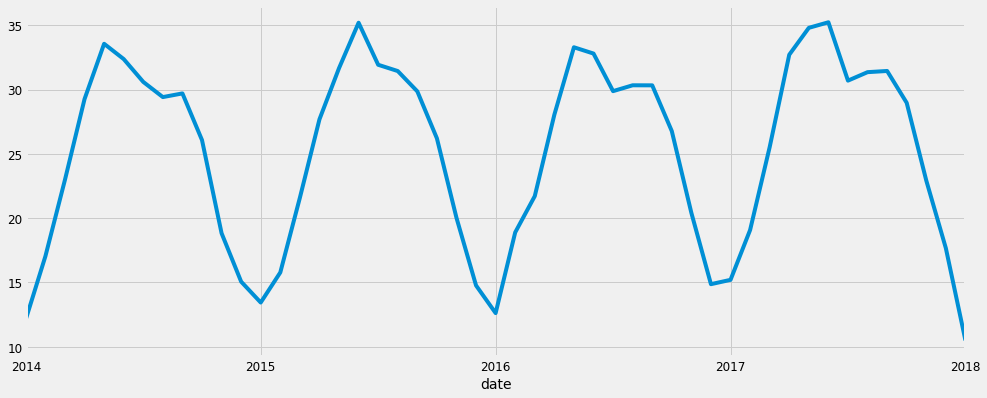

In [10]:
y.plot(figsize = (15, 6))
plt.show()

###### Time-series decompositon 
* It allows us to decompose our time series into three distinct components
<ul>
<li>Trend</li>
<li>Seasonality</li>
<li>Noise</li>
</ul>


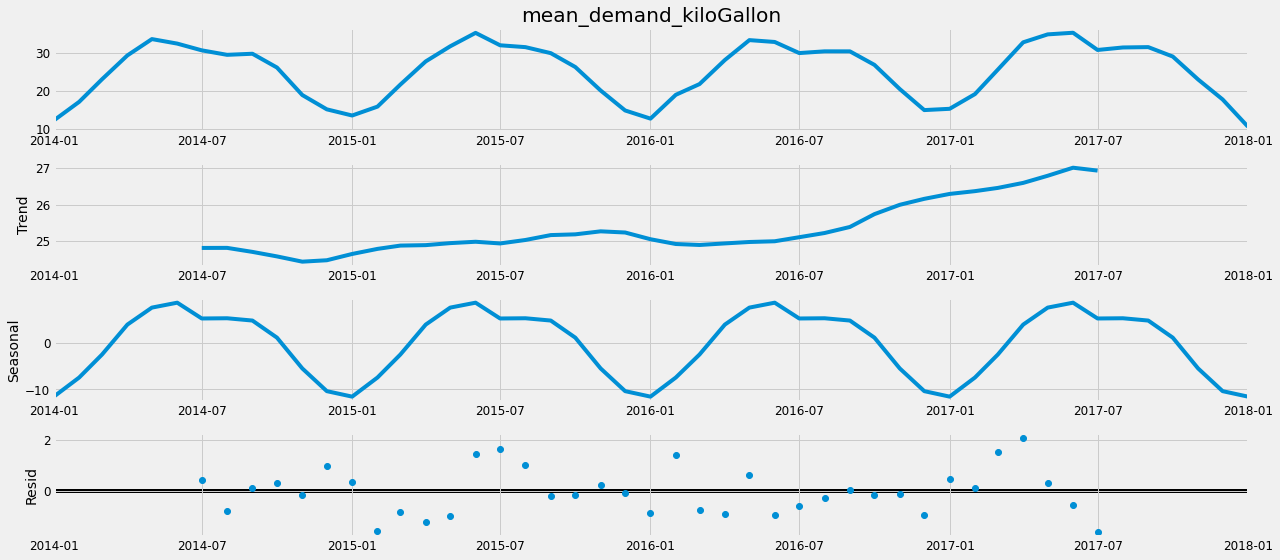

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA model

<p>
    <b><i>About ARIMA model</i></b>
<ul>
    <li>ARIMA stands for <i>Autoregressive Integreted Moving Average</i></li>
    <li>ARIMA models are denoted with the notation <i>ARIMA(p, d, q)</i></li>
    <li>These three parameters account for <i>seasonality, trend, and noise</i> in data</li>
</ul>
</p>

In [12]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:460.9861655838042
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:424.17785829719963
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:158.03084019535632


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1751.0131278415943
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:272.90957143625565
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:270.33770194826917
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:155.8999612752732
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:157.63155096008737
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:402.4402624627047


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:366.40961080052125
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:156.66004754598256


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2014.2115101392665
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:262.9110175816099


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:267.5272236557786
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:148.96289118978825
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:150.22762669354466
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:277.2957732925051


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1815.878746831483
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:162.3787395994116
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:150.64531259781057
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:231.2558999203261


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1246.7336572639877
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:149.38147195692494
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:149.45385610220478
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:255.9703141306805


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1758.0470204895926
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:155.67415776717922
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:148.03913458858977
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:233.2322324127903


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1542.4684050972173
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:149.8613463236397
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:149.7166474197028
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:287.3032814494002


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:289.60969524330267
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:155.90824980059017


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1495.4500346308366
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:238.90976669178104


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:226.7229263565075
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:146.81975966881922
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:147.34145262289385
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:265.7542576940328


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:268.33919797177526
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:157.56371241819568
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1770.710324346018
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:240.90976665709144


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:228.70858007414944
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:148.71537137671973
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:149.2047650170846


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:249.01733196217194


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1563.7586127687778
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:159.92724699929772
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:150.6320959438118
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:233.2197509333677


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1845.1697451910063
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:150.7628790953524
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:150.95983148684292
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:248.1509760181873


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1506.6330989571331
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:155.97154189156274
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:147.05881920615653
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:235.1516869419214


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1955.3221580270138
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:147.19408669114193
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:147.38856539089255


###### Fitting the ARIMA model

In [14]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4780      0.313      1.529      0.126      -0.135       1.091
ma.L1         -0.9988     10.026     -0.100      0.921     -20.650      18.652
ar.S.L12      -0.6495      0.222     -2.920      0.004      -1.086      -0.214
sigma2         2.1258     21.556      0.099      0.921     -40.124      44.375


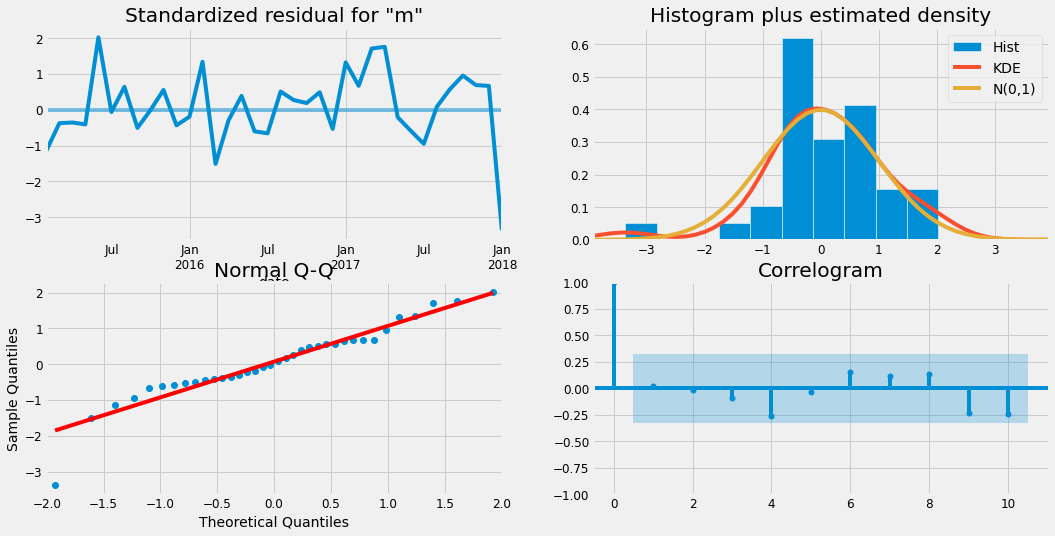

In [15]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

<p>It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.</p>

###### Validating Forecasts

<p>
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at <i>2017–01–01</i> to <i>the end of the data.</i>
</p>

In [16]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower mean_demand_kiloGallon,upper mean_demand_kiloGallon
date,,
2017-01-01,10.282136,16.165928
2017-02-01,15.141887,21.015935
2017-03-01,20.034009,25.899359
2017-04-01,27.150466,33.008004
2017-05-01,32.185402,38.035887
2017-06-01,33.181106,39.025190
2017-07-01,29.190274,35.028523
2017-08-01,28.311660,34.144568
2017-09-01,27.680305,33.508306


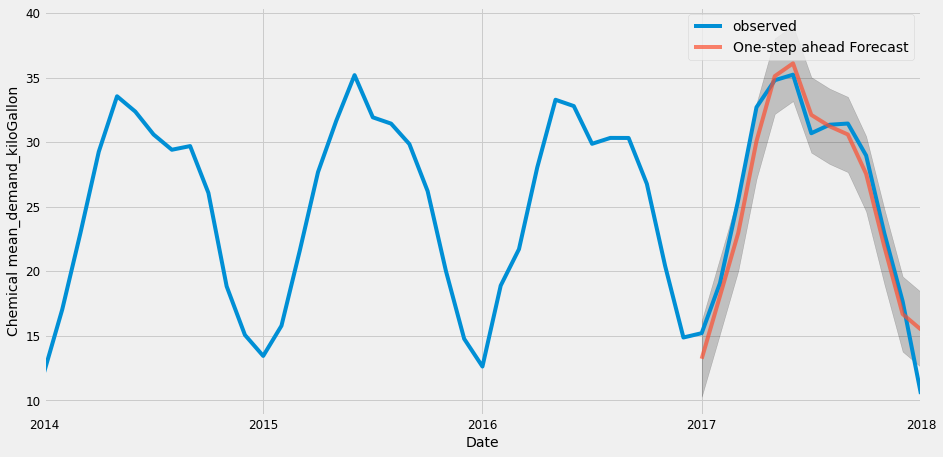

In [17]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Chemical mean_demand_kiloGallon')
plt.legend()
plt.show()

<p>The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.
</p>

###### Error Analysis

In [37]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))


The Mean Squared Error of our forecasts is 3.91
The Root Mean Squared Error of our forecasts is 1.98


##### Producing and visualizing forecasts

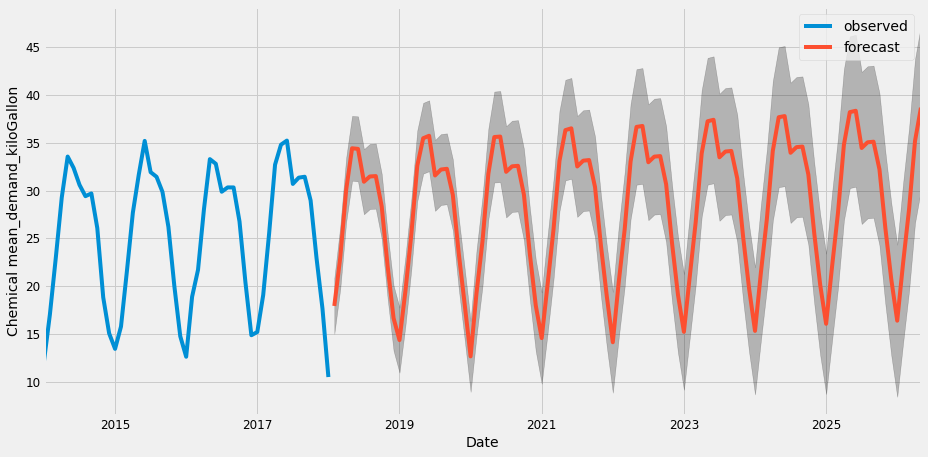

In [18]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Chemical mean_demand_kiloGallon')

plt.legend()
plt.show()

## Summary

<ul>
<li>Our model clearly captured Chemical sales seasonality.</li>
<li>As we forecast further out into the future, it is natural for us to become less confident in our values.</li>
<li>This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.</li>

</ul>

In [46]:
print(pred_uc)

In [43]:
prediction = []
prediction = result.get_prediction(start=pd.to_datetime('2015-01-01'), end=pd.to_datetime('2025-12-31'), dynamic=False)
prediction = prediction.predicted_mean.apply(np.exp)
print(prediction)

2015-01-01    1.513096e+09
2015-02-01    9.215150e+07
2015-03-01    5.339655e+09
2015-04-01    2.225019e+12
2015-05-01    1.315541e+14
                  ...     
2025-09-01    1.763295e+15
2025-10-01    9.847371e+13
2025-11-01    2.083009e+11
2025-12-01    9.752157e+08
2026-01-01    1.314185e+07
Freq: MS, Name: predicted_mean, Length: 133, dtype: float64


In [30]:
prediction.to_csv(index=False)

'predicted_mean\r\n553508.2418021612\r\n71051155.39725561\r\n9425489625.571934\r\n11567667886608.566\r\n1771573296162447.8\r\n4779670864322814.0\r\n88091598517106.94\r\n36492005817345.6\r\n19361461281580.133\r\n919115981119.5485\r\n3259270648.5157256\r\n17595504.66559976\r\n5321899.403080467\r\n'

In [44]:
from pathlib import Path  

filepath = Path('E:\Main\File Uploads/prediction.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

prediction.to_csv('E:\Main\File Uploads/prediction.csv')